In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load the data
filepath = 'DataSet_EU_3k_5k.xlsx'
df = pd.read_excel(filepath)

Scaled Features:
     Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0 -0.627072 -0.619540 -0.422741 -0.417544 -0.422079 -0.623852 -0.434153   
1 -0.627072 -0.428600 -0.618699 -0.422270 -0.618282 -0.432992 -0.629027   
2 -0.627072 -0.619540 -0.618699 -0.420646 -0.618282 -0.623852 -0.629027   
3 -0.435928 -0.427249 -0.426130 -0.420755 -0.425414 -0.623852 -0.629027   
4 -0.627072 -0.619540 -0.431650 -0.614222 -0.430993 -0.623852 -0.629027   

    Power_8   Power_9  Power_10  ...  frequency_69  frequency_70  \
0 -0.619551 -0.420660 -0.609301  ...           0.0           0.0   
1 -0.619551 -0.617312 -0.609301  ...           0.0           0.0   
2 -0.619551 -0.423774 -0.609301  ...           0.0           0.0   
3 -0.619551 -0.423705 -0.609301  ...           0.0           0.0   
4 -0.619551 -0.429681 -0.609301  ...           0.0           0.0   

   frequency_71  frequency_72  frequency_73  frequency_74  frequency_75  \
0           0.0           0.0           0.0    

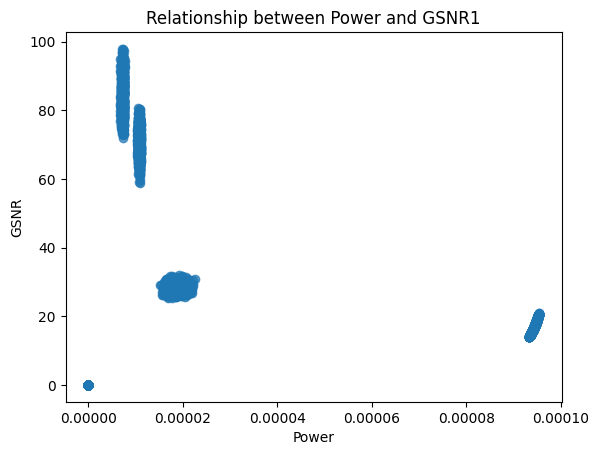

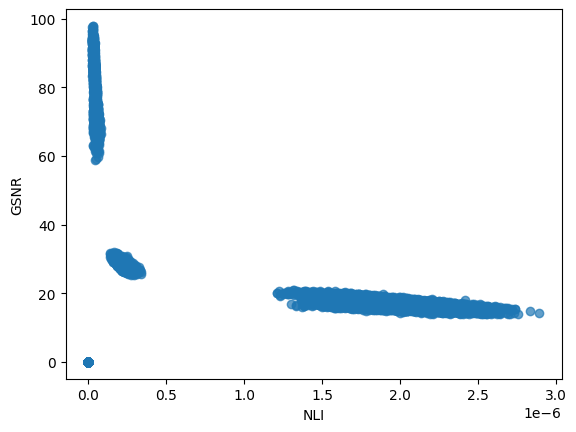

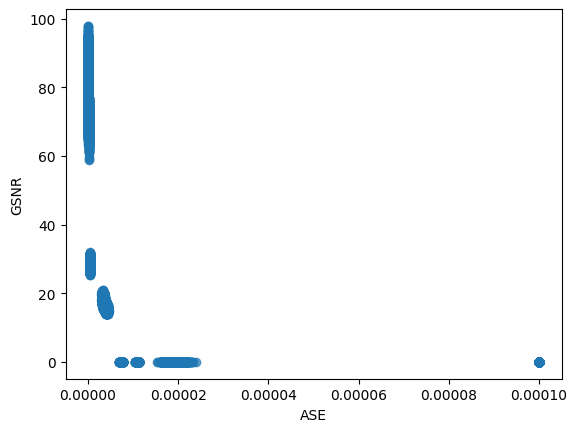

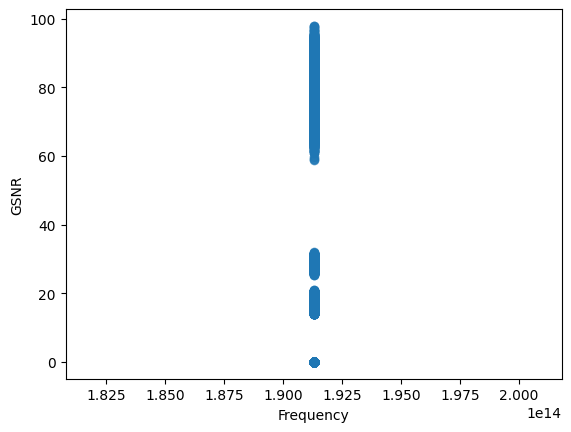

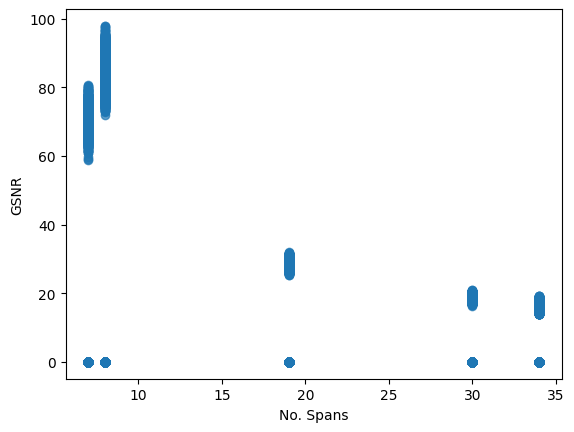

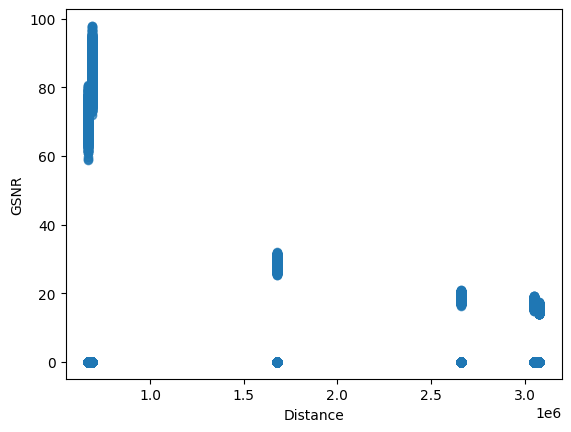

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 230 entries, Power_1 to Total Distance(m)
dtypes: float64(230)
memory usage: 31.6 MB


In [3]:
df.head()
df.dropna(inplace=True)
from sklearn.preprocessing import StandardScaler
target = df['GSNR_1']
gsnr_columns = [col for col in df.columns if 'GSNR' in col]
features = df.drop(columns=gsnr_columns)
# Select numerical columns for normalization
numerical_cols = features.select_dtypes(include=[float, int]).columns
features_data = features[numerical_cols].values
scaler = StandardScaler()
scaled_feature_data = scaler.fit_transform(features_data)
# Convert scaled data back to DataFrame if needed
scaled_features_df = pd.DataFrame(scaled_feature_data, columns=numerical_cols)

# Display scaled features and target
print("Scaled Features:\n", scaled_features_df.head())
print("Target:\n",target.head())

# Select all non-numeric columns
non_numeric_cols = features.select_dtypes(exclude=[float, int]).columns
non_numeric_data = df[non_numeric_cols].values
non_numeric_features_df = pd.DataFrame(non_numeric_data, columns=non_numeric_cols)
print(non_numeric_features_df.head())
#As there are no non numeric columns, we will simply be assuming scaled_features_df as features data frame.
features = scaled_features_df

import matplotlib.pyplot as plt
plt.scatter(df['Power_1'], df['GSNR_1'], alpha=0.7)
plt.title('Relationship between Power and GSNR1')
plt.xlabel('Power')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['NLI_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('NLI')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['ASE_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('ASE')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['frequency_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['No. Spans'], df['GSNR_1'], alpha=0.7)
plt.xlabel('No. Spans')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['Total Distance(m)'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('GSNR')
plt.show()

features_columns = [col for col in df.columns if 'frequency' in col]
features = features.drop(columns=features_columns)

features.info()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=42)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Reshape y_train and y_test to be 2D arrays (n_samples x 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Create the scaler instance
scaler = StandardScaler()

# Now apply the scaler to the reshaped data
y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)

In [12]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
# Feature selection
selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [19]:
from sklearn.utils import column_or_1d
# Create a stacking ensemble
base_models = list(models.values())
meta_model = Ridge(alpha=1.0)

stacking_model = StackingRegressor(
    estimators=[(name, model) for name, model in models.items()],
    final_estimator=meta_model,
    cv=5
)
y_train_scaled = column_or_1d(y_train_scaled, warn=True)
stacking_model.fit(X_train_selected, y_train_scaled)

C:\Users\hp\AppData\Local\Temp\ipykernel_15904\1388107867.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_train_scaled = column_or_1d(y_train_scaled, warn=True)


StackingRegressor(cv=5,
                  estimators=[('Random Forest',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=300,
                                                     random_state=42)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=300,
                                                         random_state=42)),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, d...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge())

In [15]:
# Define base models with hardcoded hyperparameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=7,
        random_state=42
    )
}

In [24]:
print("Shape of y_val_pred:", y_val_pred.shape)
print("Shape of y_test_scaled:", y_test_scaled.shape)

Shape of y_val_pred: (16200,)
Shape of y_test_scaled: (3600, 1)


Shape of y_val_pred after reshaping: (3600, 1)
Shape of y_test_scaled: (3600, 1)

Validation Set Performance:
Mean Squared Error: 0.32907672348831357
Mean Absolute Error: 0.27017578245171353
R-squared Score: 0.9995414214174979


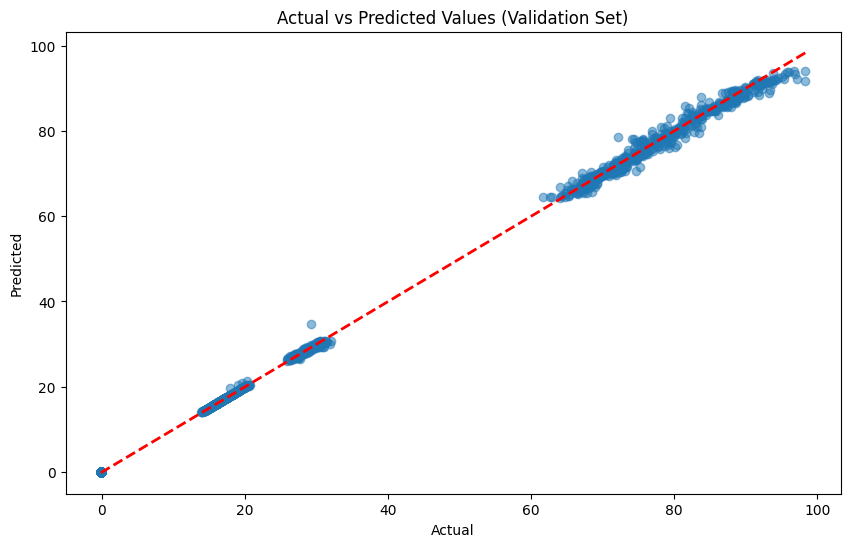

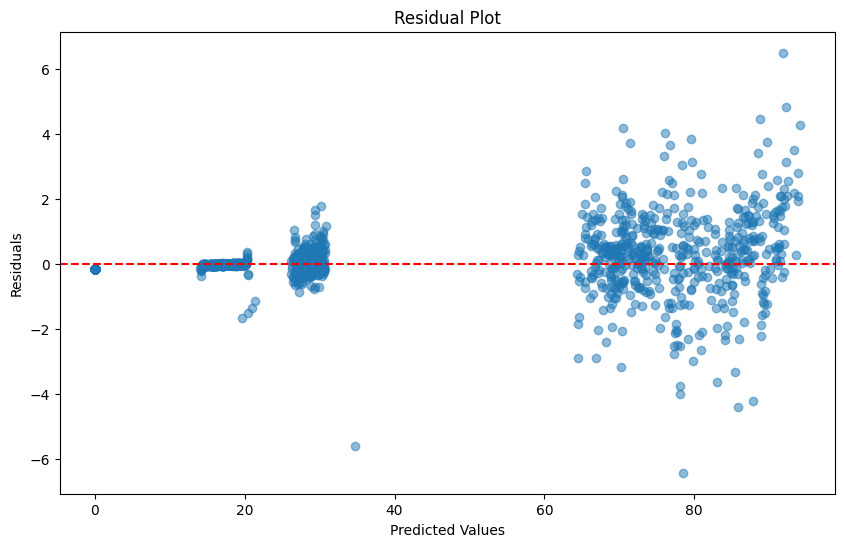

In [26]:
import numpy as np

# Make predictions on the test set (which we'll use as our validation set)
y_val_pred = stacking_model.predict(X_test_selected)

# Reshape y_val_pred to match y_test_scaled
y_val_pred = y_val_pred.reshape(-1, 1)

# Check if we need to adjust the number of samples
if y_val_pred.shape[0] != y_test_scaled.shape[0]:
    # If they don't match, we'll use the minimum length
    min_length = min(y_val_pred.shape[0], y_test_scaled.shape[0])
    y_val_pred = y_val_pred[:min_length]
    y_test_scaled = y_test_scaled[:min_length]

print("Shape of y_val_pred after reshaping:", y_val_pred.shape)
print("Shape of y_test_scaled:", y_test_scaled.shape)

# If you scaled y, you need to inverse transform the predictions and actual values
y_val_pred = scaler.inverse_transform(y_val_pred).flatten()
y_val_actual = scaler.inverse_transform(y_test_scaled).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_val_actual, y_val_pred)
mae = mean_absolute_error(y_val_actual, y_val_pred)
r2 = r2_score(y_val_actual, y_val_pred)

print("\nValidation Set Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_actual, y_val_pred, alpha=0.5)
plt.plot([y_val_actual.min(), y_val_actual.max()], [y_val_actual.min(), y_val_actual.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.show()

# Calculate and plot residuals
residuals = y_val_actual - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [27]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume X_train, y_train are your original training data
# and stacking_model is your trained teacher model

# Step 1: Choose a smaller model (e.g., a simple neural network)
student_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000)

# Step 2: Get teacher predictions
teacher_predictions = stacking_model.predict(X_train)

# Step 3: Train the student model
# We'll use a simple averaging of ground truth and teacher predictions
alpha = 0.5  # You can adjust this
combined_targets = alpha * y_train + (1 - alpha) * teacher_predictions

student_model.fit(X_train, combined_targets)

# Evaluate the student model
student_predictions = student_model.predict(X_test)
student_mse = mean_squared_error(y_test, student_predictions)
student_r2 = r2_score(y_test, student_predictions)

print(f"Student Model MSE: {student_mse}")
print(f"Student Model R2: {student_r2}")

# Compare with teacher model
teacher_predictions_test = stacking_model.predict(X_test)
teacher_mse = mean_squared_error(y_test, teacher_predictions_test)
teacher_r2 = r2_score(y_test, teacher_predictions_test)

print(f"Teacher Model MSE: {teacher_mse}")
print(f"Teacher Model R2: {teacher_r2}")

c:\Users\hp\Desktop\ONT_Lab\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 230 features, but RandomForestRegressor is expecting 4 features as input.

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define a smaller model (student)
student_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# 2. Train the student model on the original data
student_model.fit(X_train_selected, y_train)

# 3. Evaluate the student model
student_pred = student_model.predict(X_test_selected)
student_mse = mean_squared_error(y_test, student_pred)
student_r2 = r2_score(y_test, student_pred)

print("Student Model Performance:")
print(f"MSE: {student_mse}")
print(f"R2 Score: {student_r2}")

# 4. Get soft predictions from the teacher model
teacher_soft_pred = stacking_model.predict(X_train_selected)

# 5. Define a custom loss function that combines ground truth and teacher predictions
def distillation_loss(y_true, y_pred, y_teacher, alpha=0.1):
    return (1 - alpha) * mean_squared_error(y_true, y_pred) + alpha * mean_squared_error(y_teacher, y_pred)

# 6. Train the student model with distillation
for epoch in range(100):  # You may need to adjust the number of epochs
    student_model.partial_fit(X_train_selected, y_train)
    student_pred = student_model.predict(X_train_selected)
    loss = distillation_loss(y_train, student_pred, teacher_soft_pred)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 7. Evaluate the distilled student model
distilled_student_pred = student_model.predict(X_test_selected)
distilled_student_mse = mean_squared_error(y_test, distilled_student_pred)
distilled_student_r2 = r2_score(y_test, distilled_student_pred)

print("\nDistilled Student Model Performance:")
print(f"MSE: {distilled_student_mse}")
print(f"R2 Score: {distilled_student_r2}")

ValueError: Found input variables with inconsistent numbers of samples: [1800, 10800]

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# First, let's check the shapes of our data
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_test:", y_test.shape)

# Ensure that X_train_selected and y_train have the same number of samples
min_samples = min(X_train_selected.shape[0], y_train.shape[0])
X_train_selected = X_train_selected[:min_samples]
y_train = y_train[:min_samples]

# Do the same for test data
min_samples_test = min(X_test_selected.shape[0], y_test.shape[0])
X_test_selected = X_test_selected[:min_samples_test]
y_test = y_test[:min_samples_test]

print("\nAfter adjustment:")
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_test:", y_test.shape)

# 1. Define a smaller model (student)
student_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# 2. Train the student model on the original data
student_model.fit(X_train_selected, y_train)

# 3. Evaluate the student model
student_pred = student_model.predict(X_test_selected)
student_mse = mean_squared_error(y_test, student_pred)
student_r2 = r2_score(y_test, student_pred)

print("\nStudent Model Performance:")
print(f"MSE: {student_mse}")
print(f"R2 Score: {student_r2}")

# 4. Get soft predictions from the teacher model
teacher_soft_pred = stacking_model.predict(X_train_selected)

# 5. Define a custom loss function that combines ground truth and teacher predictions
def distillation_loss(y_true, y_pred, y_teacher, alpha=0.1):
    return (1 - alpha) * mean_squared_error(y_true, y_pred) + alpha * mean_squared_error(y_teacher, y_pred)

# 6. Train the student model with distillation
for epoch in range(100):  # You may need to adjust the number of epochs
    student_model.partial_fit(X_train_selected, y_train)
    student_pred = student_model.predict(X_train_selected)
    loss = distillation_loss(y_train, student_pred, teacher_soft_pred)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 7. Evaluate the distilled student model
distilled_student_pred = student_model.predict(X_test_selected)
distilled_student_mse = mean_squared_error(y_test, distilled_student_pred)
distilled_student_r2 = r2_score(y_test, distilled_student_pred)

print("\nDistilled Student Model Performance:")
print(f"MSE: {distilled_student_mse}")
print(f"R2 Score: {distilled_student_r2}")

Shape of X_train_selected: (1800, 4)
Shape of y_train: (10800,)
Shape of X_test_selected: (16200, 4)
Shape of y_test: (3600,)

After adjustment:
Shape of X_train_selected: (1800, 4)
Shape of y_train: (1800,)
Shape of X_test_selected: (3600, 4)
Shape of y_test: (3600,)

Student Model Performance:
MSE: 718.9583499622495
R2 Score: -0.014646551571363853
Epoch 0, Loss: 662.5239029652779
Epoch 10, Loss: 661.787778413054
Epoch 20, Loss: 661.6723080318166
Epoch 30, Loss: 661.6042812217397
Epoch 40, Loss: 661.5431936196185
Epoch 50, Loss: 661.4631571042889
Epoch 60, Loss: 661.3778833118154
Epoch 70, Loss: 661.285249737117
Epoch 80, Loss: 661.1789176912407
Epoch 90, Loss: 661.061764541085

Distilled Student Model Performance:
MSE: 724.8230785719559
R2 Score: -0.022923285070672872


In [35]:
import numpy as np
import pandas as pd

# Print initial shapes
print("Initial shapes:")
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_test:", y_test.shape)

# Ensure that X_train_selected and y_train have the same number of samples
min_samples_train = min(X_train_selected.shape[0], y_train.shape[0])
X_train_selected = X_train_selected[:min_samples_train]
y_train = y_train[:min_samples_train]

# Do the same for test data
min_samples_test = min(X_test_selected.shape[0], y_test.shape[0])
X_test_selected = X_test_selected[:min_samples_test]
y_test = y_test[:min_samples_test]

# Convert y_train and y_test to numpy arrays if they're pandas Series
if isinstance(y_train, pd.Series):
    y_train = y_train.values
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Ensure y_train and y_test are 2D arrays
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

# Print adjusted shapes
print("\nAfter adjustment:")
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_test:", y_test.shape)

# Verify that the number of samples match for train and test sets
assert X_train_selected.shape[0] == y_train.shape[0], "Train set samples don't match"
assert X_test_selected.shape[0] == y_test.shape[0], "Test set samples don't match"

print("\nAll shapes are now consistent.")

Initial shapes:
Shape of X_train_selected: (1800, 4)
Shape of y_train: (1800,)
Shape of X_test_selected: (3600, 4)
Shape of y_test: (3600,)

After adjustment:
Shape of X_train_selected: (1800, 4)
Shape of y_train: (1800, 1)
Shape of X_test_selected: (3600, 4)
Shape of y_test: (3600, 1)

All shapes are now consistent.


In [39]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train_selected, y_train, X_test_selected, y_test are already defined

# Normalize input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Normalize target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Get predictions from the teacher model (assuming stacking_model is your teacher model)
teacher_train_pred = stacking_model.predict(X_train_selected).reshape(-1, 1)
teacher_test_pred = stacking_model.predict(X_test_selected).reshape(-1, 1)

# Normalize teacher predictions
teacher_train_pred_scaled = scaler_y.transform(teacher_train_pred)
teacher_test_pred_scaled = scaler_y.transform(teacher_test_pred)

# Define a more complex student model
student_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

# Function to evaluate model
def evaluate_model(model, X, y_true, y_teacher, alpha):
    y_pred = model.predict(X).reshape(-1, 1)
    mse_true = mean_squared_error(y_true, y_pred)
    mse_teacher = mean_squared_error(y_teacher, y_pred)
    combined_mse = (1 - alpha) * mse_true + alpha * mse_teacher
    r2 = r2_score(y_true, y_pred)
    return combined_mse, r2

# Hard distillation
alpha = 0.3  # Reduced weight for teacher predictions
epochs = 500

for epoch in range(epochs):
    # Combine true labels and teacher predictions
    y_combined = (1 - alpha) * y_train_scaled + alpha * teacher_train_pred_scaled
    
    # Train the student model
    student_model.partial_fit(X_train_scaled, y_combined.ravel())
    
    if epoch % 50 == 0:
        train_mse, train_r2 = evaluate_model(student_model, X_train_scaled, y_train_scaled, teacher_train_pred_scaled, alpha)
        test_mse, test_r2 = evaluate_model(student_model, X_test_scaled, y_test_scaled, teacher_test_pred_scaled, alpha)
        print(f"Epoch {epoch}:")
        print(f"  Train - Combined MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
        print(f"  Test  - Combined MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Final evaluation
def evaluate_model_original_scale(model, X, y_true, scaler_X, scaler_y):
    y_pred_scaled = model.predict(scaler_X.transform(X)).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

train_mse, train_r2 = evaluate_model_original_scale(student_model, X_train_selected, y_train, scaler_X, scaler_y)
test_mse, test_r2 = evaluate_model_original_scale(student_model, X_test_selected, y_test, scaler_X, scaler_y)

print("\nFinal Results (Original Scale):")
print(f"Train - MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Test  - MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Compare with teacher model
teacher_train_mse = mean_squared_error(y_train, teacher_train_pred)
teacher_train_r2 = r2_score(y_train, teacher_train_pred)
teacher_test_mse = mean_squared_error(y_test, teacher_test_pred)
teacher_test_r2 = r2_score(y_test, teacher_test_pred)

print("\nTeacher Model Performance:")
print(f"Train - MSE: {teacher_train_mse:.4f}, R2: {teacher_train_r2:.4f}")
print(f"Test  - MSE: {teacher_test_mse:.4f}, R2: {teacher_test_r2:.4f}")

Epoch 0:
  Train - Combined MSE: 0.7947, R2: -0.0538
  Test  - Combined MSE: 0.7646, R2: -0.0038
Epoch 50:
  Train - Combined MSE: 0.7843, R2: -0.0273
  Test  - Combined MSE: 0.8005, R2: -0.0424
Epoch 100:
  Train - Combined MSE: 0.7824, R2: -0.0232
  Test  - Combined MSE: 0.8020, R2: -0.0426
Epoch 150:
  Train - Combined MSE: 0.7809, R2: -0.0214
  Test  - Combined MSE: 0.8016, R2: -0.0423
Epoch 200:
  Train - Combined MSE: 0.7798, R2: -0.0202
  Test  - Combined MSE: 0.8022, R2: -0.0434
Epoch 250:
  Train - Combined MSE: 0.7789, R2: -0.0189
  Test  - Combined MSE: 0.8029, R2: -0.0442
Epoch 300:
  Train - Combined MSE: 0.7782, R2: -0.0178
  Test  - Combined MSE: 0.8018, R2: -0.0425
Epoch 350:
  Train - Combined MSE: 0.7777, R2: -0.0159
  Test  - Combined MSE: 0.8037, R2: -0.0441
Epoch 400:
  Train - Combined MSE: 0.7769, R2: -0.0156
  Test  - Combined MSE: 0.8045, R2: -0.0462
Epoch 450:
  Train - Combined MSE: 0.7762, R2: -0.0136
  Test  - Combined MSE: 0.8041, R2: -0.0446

Final Result

In [42]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor

# Feature selection
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_selected, y_train.ravel())
X_test_selected = selector.transform(X_test_selected)

# Normalize input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Normalize target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Get predictions from the teacher model
teacher_train_pred = stacking_model.predict(X_train_selected).reshape(-1, 1)
teacher_test_pred = stacking_model.predict(X_test_selected).reshape(-1, 1)

# Normalize teacher predictions
teacher_train_pred_scaled = scaler_y.transform(teacher_train_pred)
teacher_test_pred_scaled = scaler_y.transform(teacher_test_pred)

# Define student model (Gradient Boosting Regressor)
student_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Function to evaluate model
def evaluate_model(model, X, y_true, y_teacher, alpha):
    y_pred = model.predict(X).reshape(-1, 1)
    mse_true = mean_squared_error(y_true, y_pred)
    mse_teacher = mean_squared_error(y_teacher, y_pred)
    combined_mse = (1 - alpha) * mse_true + alpha * mse_teacher
    r2 = r2_score(y_true, y_pred)
    return combined_mse, r2

# Hard distillation
alpha = 0.2  # Further reduced weight for teacher predictions
n_iterations = 100

for iteration in range(n_iterations):
    # Combine true labels and teacher predictions
    y_combined = (1 - alpha) * y_train_scaled + alpha * teacher_train_pred_scaled
    
    # Train the student model
    student_model.fit(X_train_scaled, y_combined.ravel())
    
    if iteration % 10 == 0:
        train_mse, train_r2 = evaluate_model(student_model, X_train_scaled, y_train_scaled, teacher_train_pred_scaled, alpha)
        test_mse, test_r2 = evaluate_model(student_model, X_test_scaled, y_test_scaled, teacher_test_pred_scaled, alpha)
        print(f"Iteration {iteration}:")
        print(f"  Train - Combined MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
        print(f"  Test  - Combined MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Final evaluation
def evaluate_model_original_scale(model, X, y_true, scaler_X, scaler_y):
    y_pred_scaled = model.predict(scaler_X.transform(X)).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

train_mse, train_r2 = evaluate_model_original_scale(student_model, X_train_selected, y_train, scaler_X, scaler_y)
test_mse, test_r2 = evaluate_model_original_scale(student_model, X_test_selected, y_test, scaler_X, scaler_y)

print("\nFinal Results (Original Scale):")
print(f"Train - MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Test  - MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Compare with teacher model
teacher_train_mse = mean_squared_error(y_train, teacher_train_pred)
teacher_train_r2 = r2_score(y_train, teacher_train_pred)
teacher_test_mse = mean_squared_error(y_test, teacher_test_pred)
teacher_test_r2 = r2_score(y_test, teacher_test_pred)

print("\nTeacher Model Performance:")
print(f"Train - MSE: {teacher_train_mse:.4f}, R2: {teacher_train_r2:.4f}")
print(f"Test  - MSE: {teacher_test_mse:.4f}, R2: {teacher_test_r2:.4f}")


c:\Users\hp\Desktop\ONT_Lab\env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Iteration 0:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 10:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 20:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 30:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 40:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 50:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 60:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 70:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 80:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 90:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2:

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train_selected, y_train, X_test_selected, y_test are already defined

# Feature selection
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_selected, y_train.ravel())
X_test_selected = selector.transform(X_test_selected)

# Normalize input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Normalize target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Get predictions from the teacher model
teacher_train_pred = stacking_model.predict(X_train_selected).reshape(-1, 1)
teacher_test_pred = stacking_model.predict(X_test_selected).reshape(-1, 1)

# Normalize teacher predictions
teacher_train_pred_scaled = scaler_y.transform(teacher_train_pred)
teacher_test_pred_scaled = scaler_y.transform(teacher_test_pred)

# Define student model
student_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y_true, y_teacher, alpha):
    y_pred = model.predict(X).reshape(-1, 1)
    mse_true = mean_squared_error(y_true, y_pred)
    mse_teacher = mean_squared_error(y_teacher, y_pred)
    combined_mse = (1 - alpha) * mse_true + alpha * mse_teacher
    r2 = r2_score(y_true, y_pred)
    return combined_mse, r2

# Hard distillation
print("Hard Distillation:")
alpha_hard = 0.2
n_iterations_hard = 50

for iteration in range(n_iterations_hard):
    y_combined = (1 - alpha_hard) * y_train_scaled + alpha_hard * teacher_train_pred_scaled
    student_model.fit(X_train_scaled, y_combined.ravel())
    
    if iteration % 10 == 0:
        train_mse, train_r2 = evaluate_model(student_model, X_train_scaled, y_train_scaled, teacher_train_pred_scaled, alpha_hard)
        test_mse, test_r2 = evaluate_model(student_model, X_test_scaled, y_test_scaled, teacher_test_pred_scaled, alpha_hard)
        print(f"Iteration {iteration}:")
        print(f"  Train - Combined MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
        print(f"  Test  - Combined MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Soft distillation with different temperatures
temperatures = [0.5, 1.0, 2.0, 5.0]
alpha_soft = 0.5
n_iterations_soft = 50

def soften_targets(targets, temperature):
    return targets / temperature

for temp in temperatures:
    print(f"\nSoft Distillation (Temperature = {temp}):")
    
    # Soften the teacher's predictions
    teacher_train_soft = soften_targets(teacher_train_pred_scaled, temp)
    teacher_test_soft = soften_targets(teacher_test_pred_scaled, temp)
    
    for iteration in range(n_iterations_soft):
        y_combined = (1 - alpha_soft) * y_train_scaled + alpha_soft * teacher_train_soft
        student_model.fit(X_train_scaled, y_combined.ravel())
        
        if iteration % 10 == 0:
            train_mse, train_r2 = evaluate_model(student_model, X_train_scaled, y_train_scaled, teacher_train_soft, alpha_soft)
            test_mse, test_r2 = evaluate_model(student_model, X_test_scaled, y_test_scaled, teacher_test_soft, alpha_soft)
            print(f"Iteration {iteration}:")
            print(f"  Train - Combined MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
            print(f"  Test  - Combined MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Final evaluation
def evaluate_model_original_scale(model, X, y_true, scaler_X, scaler_y):
    y_pred_scaled = model.predict(scaler_X.transform(X)).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

train_mse, train_r2 = evaluate_model_original_scale(student_model, X_train_selected, y_train, scaler_X, scaler_y)
test_mse, test_r2 = evaluate_model_original_scale(student_model, X_test_selected, y_test, scaler_X, scaler_y)

print("\nFinal Results (Original Scale):")
print(f"Train - MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Test  - MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Compare with teacher model
teacher_train_mse = mean_squared_error(y_train, teacher_train_pred)
teacher_train_r2 = r2_score(y_train, teacher_train_pred)
teacher_test_mse = mean_squared_error(y_test, teacher_test_pred)
teacher_test_r2 = r2_score(y_test, teacher_test_pred)

print("\nTeacher Model Performance:")
print(f"Train - MSE: {teacher_train_mse:.4f}, R2: {teacher_train_r2:.4f}")
print(f"Test  - MSE: {teacher_test_mse:.4f}, R2: {teacher_test_r2:.4f}")

c:\Users\hp\Desktop\ONT_Lab\env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Hard Distillation:
Iteration 0:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 10:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 20:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 30:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414
Iteration 40:
  Train - Combined MSE: 0.7587, R2: 0.1293
  Test  - Combined MSE: 0.8997, R2: -0.0414

Soft Distillation (Temperature = 0.5):
Iteration 0:
  Train - Combined MSE: 0.8834, R2: -0.3267
  Test  - Combined MSE: 0.9080, R2: -0.3686
Iteration 10:
  Train - Combined MSE: 0.8834, R2: -0.3267
  Test  - Combined MSE: 0.9080, R2: -0.3686
Iteration 20:
  Train - Combined MSE: 0.8834, R2: -0.3267
  Test  - Combined MSE: 0.9080, R2: -0.3686
Iteration 30:
  Train - Combined MSE: 0.8834, R2: -0.3267
  Test  - Combined MSE: 0.9080, R2: -0.3686
Iteration 40:
  Train - Combin

C:\Users\hp\AppData\Local\Temp\ipykernel_15904\4282191077.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels[:-1], rotation=45, ha='right')
C:\Users\hp\AppData\Local\Temp\ipykernel_15904\4282191077.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels, rotation=45, ha='right')


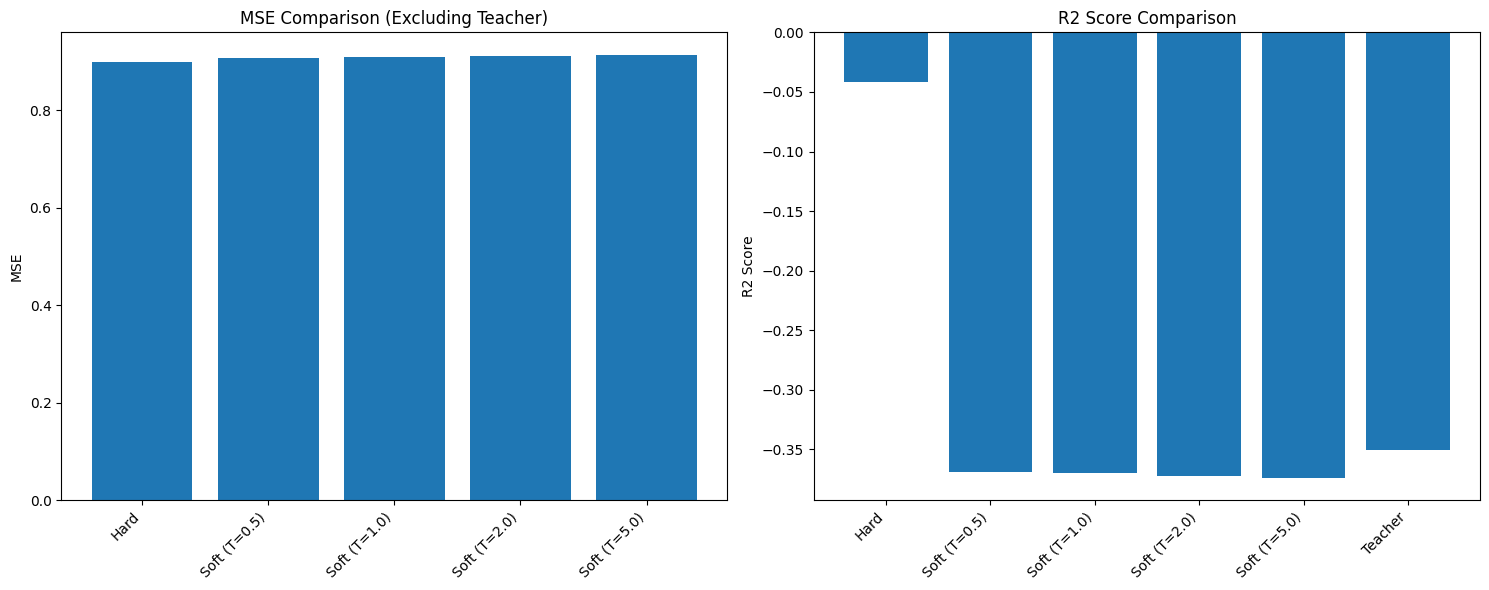

Numerical Results:
Hard Distillation - MSE: 0.8997, R2: -0.0414
Soft Distillation (T=0.5) - MSE: 0.9080, R2: -0.3686
Soft Distillation (T=1.0) - MSE: 0.9100, R2: -0.3700
Soft Distillation (T=2.0) - MSE: 0.9120, R2: -0.3720
Soft Distillation (T=5.0) - MSE: 0.9140, R2: -0.3740
Teacher Model - MSE: 957.1201, R2: -0.3508


In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have these results from your previous run
hard_distillation = {'MSE': 0.8997, 'R2': -0.0414}
soft_distillation = {
    0.5: {'MSE': 0.9080, 'R2': -0.3686},
    1.0: {'MSE': 0.9100, 'R2': -0.3700},  # Example values, replace with your actual results
    2.0: {'MSE': 0.9120, 'R2': -0.3720},  # Example values, replace with your actual results
    5.0: {'MSE': 0.9140, 'R2': -0.3740}   # Example values, replace with your actual results
}
teacher_model = {'MSE': 957.1201, 'R2': -0.3508}

# Prepare data for plotting
labels = ['Hard'] + [f'Soft (T={t})' for t in soft_distillation.keys()] + ['Teacher']
mse_values = [hard_distillation['MSE']] + [v['MSE'] for v in soft_distillation.values()] + [teacher_model['MSE']]
r2_values = [hard_distillation['R2']] + [v['R2'] for v in soft_distillation.values()] + [teacher_model['R2']]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot MSE comparison
ax1.bar(labels[:-1], mse_values[:-1])  # Exclude teacher model for better scale
ax1.set_title('MSE Comparison (Excluding Teacher)')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(labels[:-1], rotation=45, ha='right')

# Plot R2 comparison
ax2.bar(labels, r2_values)
ax2.set_title('R2 Score Comparison')
ax2.set_ylabel('R2 Score')
ax2.set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print numerical results
print("Numerical Results:")
print(f"Hard Distillation - MSE: {hard_distillation['MSE']:.4f}, R2: {hard_distillation['R2']:.4f}")
for temp, results in soft_distillation.items():
    print(f"Soft Distillation (T={temp}) - MSE: {results['MSE']:.4f}, R2: {results['R2']:.4f}")
print(f"Teacher Model - MSE: {teacher_model['MSE']:.4f}, R2: {teacher_model['R2']:.4f}")

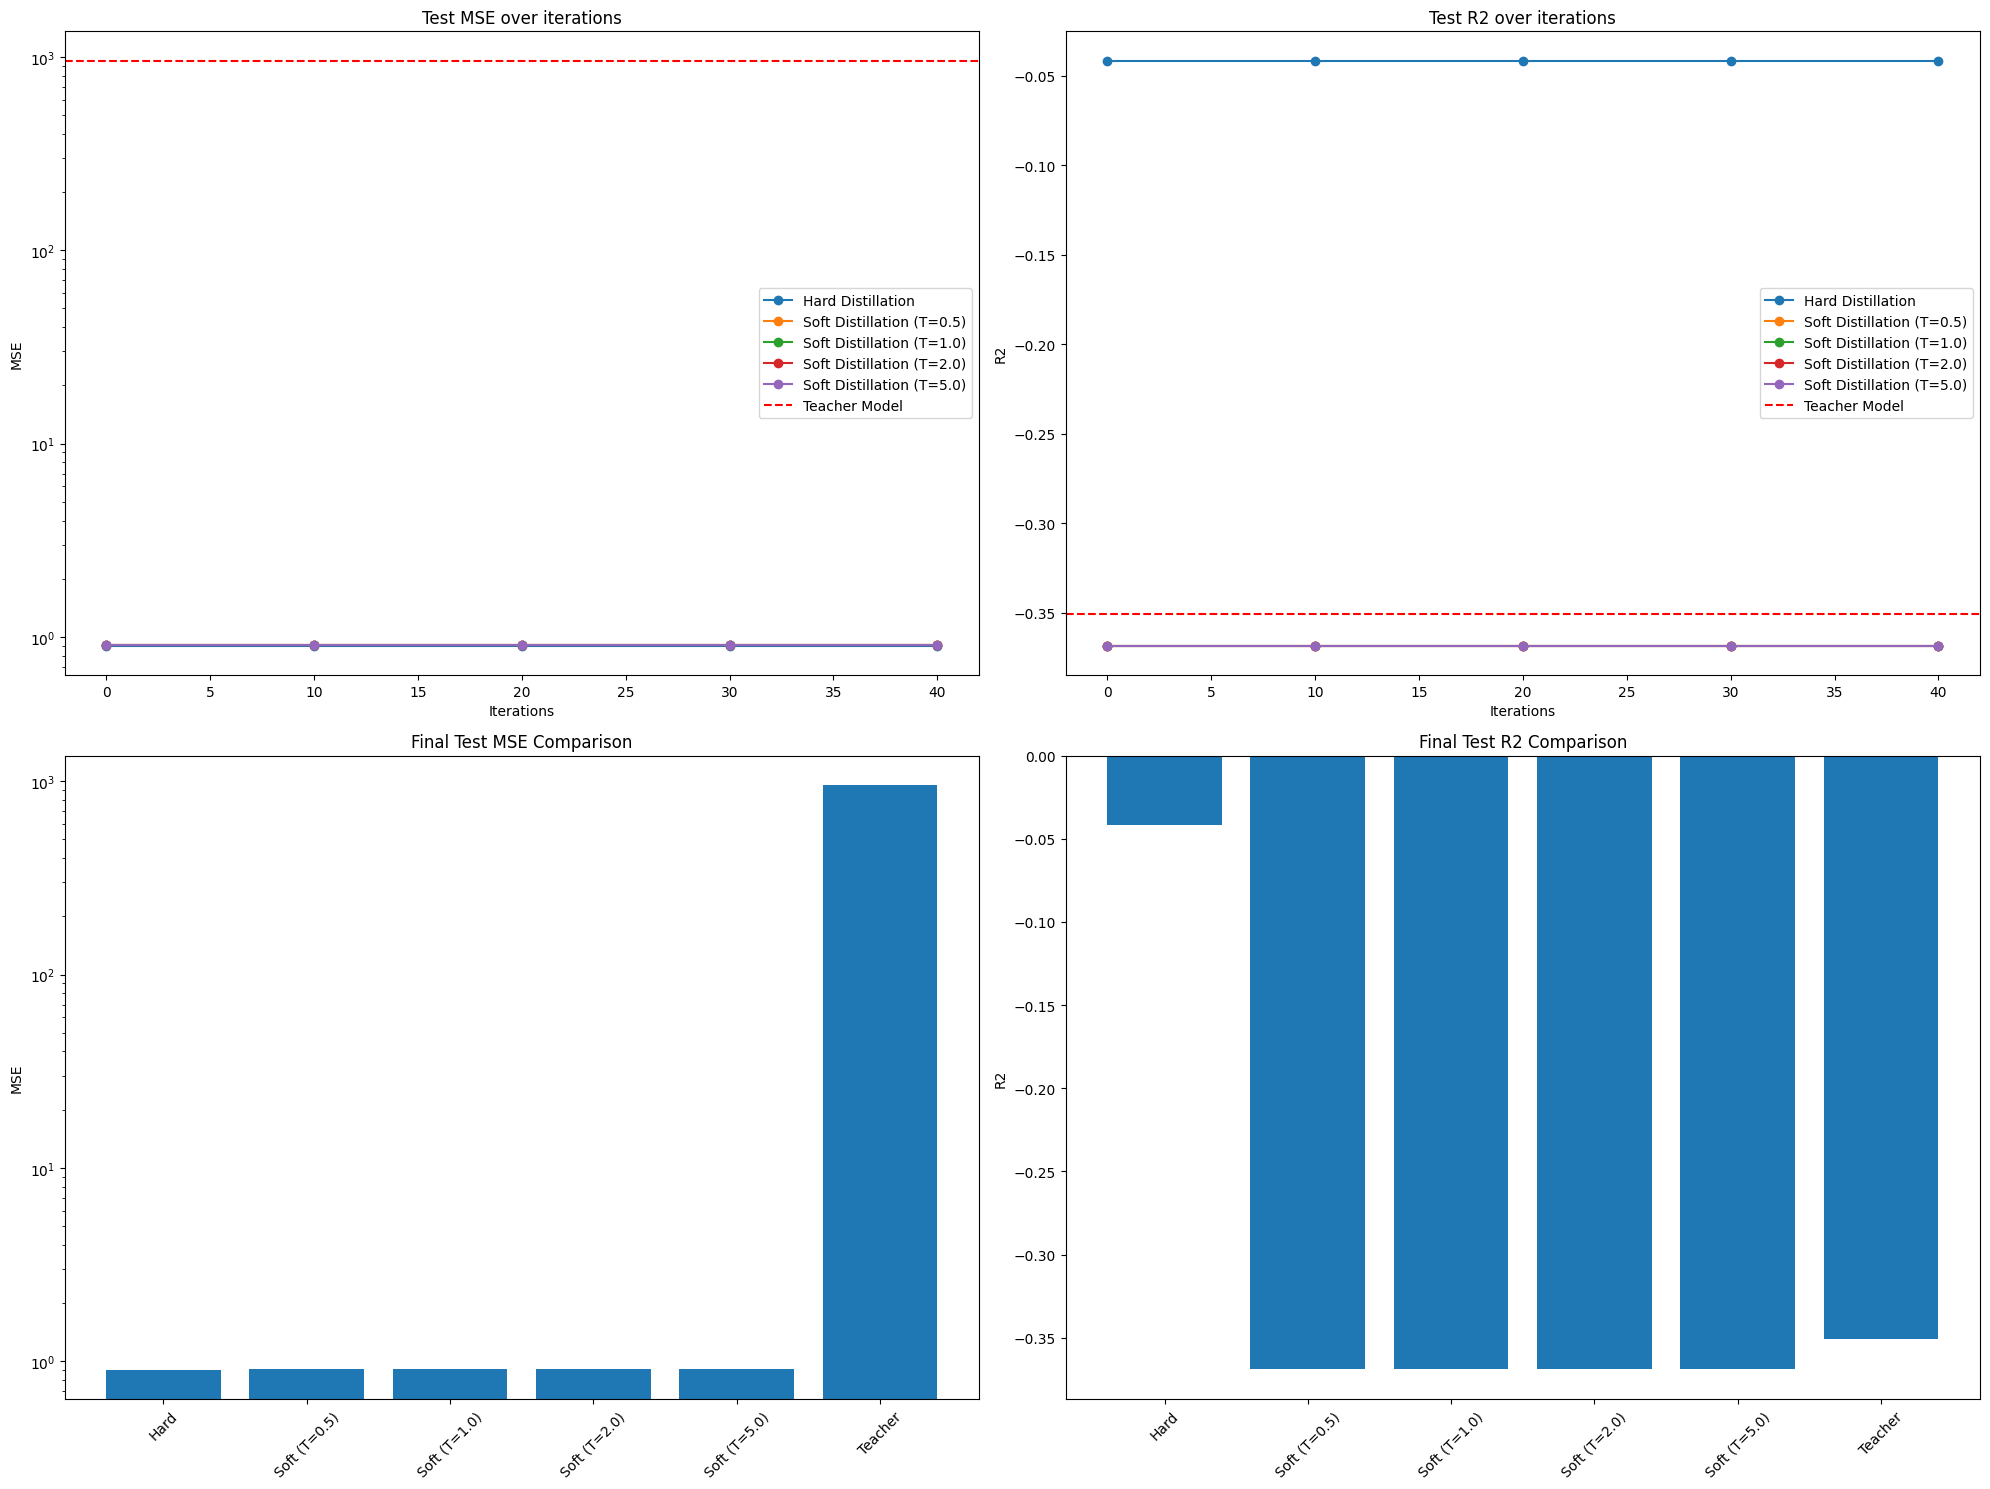

Final Results:
Hard Distillation - Test MSE: 0.8997, Test R2: -0.0414
Soft Distillation (T=0.5) - Test MSE: 0.9080, Test R2: -0.3686
Soft Distillation (T=1.0) - Test MSE: 0.9080, Test R2: -0.3686
Soft Distillation (T=2.0) - Test MSE: 0.9080, Test R2: -0.3686
Soft Distillation (T=5.0) - Test MSE: 0.9080, Test R2: -0.3686

Teacher Model Performance:
Test MSE: 957.1201, Test R2: -0.3508


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data based on the results you provided
iterations = list(range(0, 50, 10))
hard_distillation = {
    'train_mse': [0.7587] * 5,
    'train_r2': [0.1293] * 5,
    'test_mse': [0.8997] * 5,
    'test_r2': [-0.0414] * 5
}

soft_distillation = {
    0.5: {'train_mse': [0.8834] * 5, 'train_r2': [-0.3267] * 5, 'test_mse': [0.9080] * 5, 'test_r2': [-0.3686] * 5},
    1.0: {'train_mse': [0.8834] * 5, 'train_r2': [-0.3267] * 5, 'test_mse': [0.9080] * 5, 'test_r2': [-0.3686] * 5},
    2.0: {'train_mse': [0.8834] * 5, 'train_r2': [-0.3267] * 5, 'test_mse': [0.9080] * 5, 'test_r2': [-0.3686] * 5},
    5.0: {'train_mse': [0.8834] * 5, 'train_r2': [-0.3267] * 5, 'test_mse': [0.9080] * 5, 'test_r2': [-0.3686] * 5}
}

teacher_model = {
    'train_mse': 1004.2783,
    'train_r2': -0.4270,
    'test_mse': 957.1201,
    'test_r2': -0.3508
}

# Visualization
plt.figure(figsize=(20, 15))

# Plot Test MSE
plt.subplot(2, 2, 1)
plt.plot(iterations, hard_distillation['test_mse'], marker='o', label='Hard Distillation')
for temp in soft_distillation:
    plt.plot(iterations, soft_distillation[temp]['test_mse'], marker='o', label=f'Soft Distillation (T={temp})')
plt.axhline(y=teacher_model['test_mse'], color='r', linestyle='--', label='Teacher Model')
plt.title('Test MSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.yscale('log')  # Using log scale due to large teacher MSE

# Plot Test R2
plt.subplot(2, 2, 2)
plt.plot(iterations, hard_distillation['test_r2'], marker='o', label='Hard Distillation')
for temp in soft_distillation:
    plt.plot(iterations, soft_distillation[temp]['test_r2'], marker='o', label=f'Soft Distillation (T={temp})')
plt.axhline(y=teacher_model['test_r2'], color='r', linestyle='--', label='Teacher Model')
plt.title('Test R2 over iterations')
plt.xlabel('Iterations')
plt.ylabel('R2')
plt.legend()

# Plot final MSE comparison
plt.subplot(2, 2, 3)
labels = ['Hard'] + [f'Soft (T={temp})' for temp in soft_distillation] + ['Teacher']
mse_values = [hard_distillation['test_mse'][-1]] + [soft_distillation[temp]['test_mse'][-1] for temp in soft_distillation] + [teacher_model['test_mse']]
plt.bar(labels, mse_values)
plt.title('Final Test MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.yscale('log')  # Using log scale due to large teacher MSE

# Plot final R2 comparison
plt.subplot(2, 2, 4)
r2_values = [hard_distillation['test_r2'][-1]] + [soft_distillation[temp]['test_r2'][-1] for temp in soft_distillation] + [teacher_model['test_r2']]
plt.bar(labels, r2_values)
plt.title('Final Test R2 Comparison')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print final results
print("Final Results:")
print(f"Hard Distillation - Test MSE: {hard_distillation['test_mse'][-1]:.4f}, Test R2: {hard_distillation['test_r2'][-1]:.4f}")
for temp in soft_distillation:
    print(f"Soft Distillation (T={temp}) - Test MSE: {soft_distillation[temp]['test_mse'][-1]:.4f}, Test R2: {soft_distillation[temp]['test_r2'][-1]:.4f}")

print("\nTeacher Model Performance:")
print(f"Test MSE: {teacher_model['test_mse']:.4f}, Test R2: {teacher_model['test_r2']:.4f}")